In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
tweets = pd.read_csv('bitcointweetsscraping.csv')
tweets.head()

,Unnamed: 0,original_Tweets,len,ID,Date,Source,Likes,RTs
0,0,Who’s the punk holding $xvg back,32,1382003660746600451,2021-04-13 16:12:03,Twitter for iPhone,0,0
1,1,RT @Bitcoin: #Bitcoin is in the top-10 of the ...,94,1382003660197142532,2021-04-13 16:12:03,Twitter Web App,0,187
2,2,RT @cryptovenizo: $50 in 24hrs\n\n✓ RT this \n...,131,1382003659374878723,2021-04-13 16:12:03,Twitter for Android,0,1026
3,3,"RT @WSBChairman: Tesla is up ~$1,000,000,000 f...",78,1382003655717629954,2021-04-13 16:12:02,Twitter for iPhone,0,307
4,4,RT @steve_hanke: #BREAKING: #Bitcoin has surge...,139,1382003654547230720,2021-04-13 16:12:02,Twitter for iPhone,0,54


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       100 non-null    int64 
 1   original_Tweets  100 non-null    object
 2   len              100 non-null    int64 
 3   ID               100 non-null    int64 
 4   Date             100 non-null    object
 5   Source           100 non-null    object
 6   Likes            100 non-null    int64 
 7   RTs              100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [ ]:
tweets.describe()

,Unnamed: 0,len,ID,Likes,RTs
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,49.500000,126.070000,1.382004e+18,0.030000,505.410000
std,29.011492,54.173171,2.953802e+10,0.171447,1417.503953
min,0.000000,16.000000,1.382004e+18,0.000000,0.000000
25%,24.750000,99.750000,1.382004e+18,0.000000,0.000000
50%,49.500000,134.500000,1.382004e+18,0.000000,37.500000
75%,74.250000,140.000000,1.382004e+18,0.000000,355.000000
max,99.000000,350.000000,1.382004e+18,1.000000,11002.000000


In [ ]:
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def contx_to_exp(text):
  for key in apostrophe_dict:
    value = apostrophe_dict[key]
    text = text.replace(key, value)
    return text

In [ ]:
emotion_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

def emotion_check(text):
  for key in emotion_dict:
    value = emotion_dict[key]
    text = text.replace(key, value)
    return text

In [ ]:
def clean_text(text):
  text = re.sub(r'https?:\/\/\S*'," ", text)
  text = re.sub(r'@\S+', " ", text)
  text = re.sub('#'," ", text)
  text = re.sub(r'RT', "", text)
  text = re.sub(r"\s+"," ", text)
  text = text.lower()
  return text

import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt.lower()

In [ ]:
tweets['clean_tweet'] = np.vectorize(remove_pattern)(tweets['original_Tweets'], "@[\w]*")
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : clean_text(x))
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : contx_to_exp(x))
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : emotion_check(x))

tweets['clean_tweet'] = tweets['clean_tweet'].str.replace("[^a-zA-Z]", " ")


tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r'[^\w\s]',' ',x))
tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r'[^a-zA-Z]', ' ', x))
tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r"\s+"," ", x))


tokenized_tweet = tweets['clean_tweet'].apply(lambda x: x.split())


from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [lemmatizer.lemmatize(stemmer.stem(word)) for word in sentence])


for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])



tweets['clean_tweet'] = tokenized_tweet
tweets.head()

,Unnamed: 0,original_Tweets,len,ID,Date,Source,Likes,RTs,clean_tweet
0,0,Who’s the punk holding $xvg back,32,1382003660746600451,2021-04-13 16:12:03,Twitter for iPhone,0,0,who s punk hold xvg back
1,1,RT @Bitcoin: #Bitcoin is in the top-10 of the ...,94,1382003660197142532,2021-04-13 16:12:03,Twitter Web App,0,187,bitcoin top world s money suppli
2,2,RT @cryptovenizo: $50 in 24hrs\n\n✓ RT this \n...,131,1382003659374878723,2021-04-13 16:12:03,Twitter for Android,0,1026,hr thi follow sponsor giveaway like thi bitcoin
3,3,"RT @WSBChairman: Tesla is up ~$1,000,000,000 f...",78,1382003655717629954,2021-04-13 16:12:02,Twitter for iPhone,0,307,tesla from their invest bitcoin
4,4,RT @steve_hanke: #BREAKING: #Bitcoin has surge...,139,1382003654547230720,2021-04-13 16:12:02,Twitter for iPhone,0,54,break bitcoin surg past hour all time high btc...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Device set to use cpu


model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

<ipython-input-11-8672ac78ccd8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


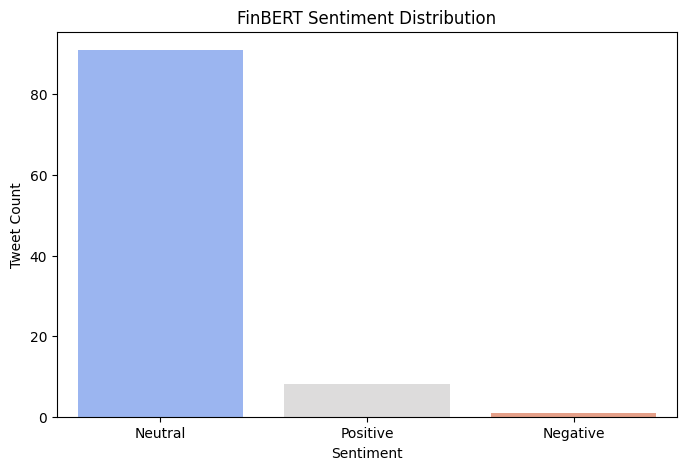

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

finbert_tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
finbert_model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")

finbert_sentiment = pipeline("sentiment-analysis", model=finbert_model, tokenizer=finbert_tokenizer)

tweets['sentiment'] = tweets['clean_tweet'].apply(lambda x: finbert_sentiment(x)[0]['label'])

sentiment_counts = tweets['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('FinBERT Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

In [ ]:
tweets.head()

,Unnamed: 0,original_Tweets,len,ID,Date,Source,Likes,RTs,clean_tweet,sentiment
0,0,Who’s the punk holding $xvg back,32,1382003660746600451,2021-04-13 16:12:03,Twitter for iPhone,0,0,who s punk hold xvg back,Neutral
1,1,RT @Bitcoin: #Bitcoin is in the top-10 of the ...,94,1382003660197142532,2021-04-13 16:12:03,Twitter Web App,0,187,bitcoin top world s money suppli,Neutral
2,2,RT @cryptovenizo: $50 in 24hrs\n\n✓ RT this \n...,131,1382003659374878723,2021-04-13 16:12:03,Twitter for Android,0,1026,hr thi follow sponsor giveaway like thi bitcoin,Neutral
3,3,"RT @WSBChairman: Tesla is up ~$1,000,000,000 f...",78,1382003655717629954,2021-04-13 16:12:02,Twitter for iPhone,0,307,tesla from their invest bitcoin,Neutral
4,4,RT @steve_hanke: #BREAKING: #Bitcoin has surge...,139,1382003654547230720,2021-04-13 16:12:02,Twitter for iPhone,0,54,break bitcoin surg past hour all time high btc...,Neutral


In [ ]:
positive_count = tweets[tweets['sentiment'] == 'Positive'].shape[0]
negative_count = tweets[tweets['sentiment'] == 'Negative'].shape[0]

print(positive_count)

community_risk_percent = (negative_count / (positive_count + negative_count)) * 100

print(f"Community Risk Factor: {community_risk_percent:.2f}%")

8
Community Risk Factor: 11.11%
